In [2]:
import pandas as pd
from sklearn.cluster import KMeans, k_means
from matplotlib import pyplot as plt
import numpy as np

In [3]:
ttl_usage_seas_dow_hr_df = pd.read_pickle('../data/ttl_usage_seas_dow_hr_df.pkl')

In [4]:
ttl_usage_seas_dow_hr_df['seas_dow_hr'] = ["S"+str(int(row['season']))+"D"+str(int(row['dayofweek']))+"H"+ ("0" + str(int(row['hour'])))[-2:] for index, row in ttl_usage_seas_dow_hr_df.iterrows()]

In [5]:
pivot_table_df = ttl_usage_seas_dow_hr_df.pivot_table(values='perc_week_usage', index=['dataid'], columns='seas_dow_hr')

In [6]:
#drop accounts with missing usage
pivot_table_df = pivot_table_df[pivot_table_df['S3D6H09'] != 0]

# K-Means Clustering

In [7]:
#determine optimum number of clusters for k-means for seasonal/day of week aggregation
for n_clust in range(2,21):
    pivot_table_df = ttl_usage_seas_dow_hr_df.pivot_table(values='perc_week_usage', 
                                                            index=['dataid'], columns='seas_dow_hr')
    pivot_table_df = pivot_table_df[~pivot_table_df['S1D0H00'].isnull()]
    pivot_table_df = pivot_table_df[pivot_table_df['S3D6H09'] != 0]
    model = KMeans(n_clusters=n_clust, random_state=0).fit(pivot_table_df)
    pivot_table_df['kmeans']= model.labels_
    sse = 0
    for n in range(model.n_clusters):
        for index, j in pivot_table_df[pivot_table_df['kmeans']==n].iterrows():
            for k in range(len(j)-1):
                sse += (j[k] - model.cluster_centers_[n][k])**2
    print(sse, n_clust)

0.0786423458269 2
0.0720984495989 3
0.0693048910935 4
0.0669447295429 5
0.0649453347304 6
0.0632666830687 7
0.0620999912001 8
0.0605646422468 9
0.0596579709344 10
0.0588850673621 11
0.0575044985629 12
0.0572135398982 13
0.0563176702673 14
0.0558261143223 15
0.0554297708858 16
0.054478073218 17
0.0545242373293 18
0.0532810546816 19
0.0528827795215 20


In [8]:
#best n-clusters determined to be 10
pivot_table_df = ttl_usage_seas_dow_hr_df.pivot_table(values='perc_week_usage', 
                                                            index=['dataid'], columns='seas_dow_hr')
pivot_table_df = pivot_table_df[~pivot_table_df['S1D0H00'].isnull()]
pivot_table_df = pivot_table_df[pivot_table_df['S3D6H09'] != 0]
model = KMeans(n_clusters=10, random_state=0).fit(pivot_table_df)
pivot_table_df['kmeans']= model.labels_

In [9]:
model.cluster_centers_

array([[ 0.00058446,  0.00053176,  0.00054367, ...,  0.00159721,
         0.00119407,  0.00082594],
       [ 0.00134908,  0.0011518 ,  0.0009957 , ...,  0.00204149,
         0.00190942,  0.00152291],
       [ 0.00058577,  0.00053678,  0.00050177, ...,  0.00121959,
         0.00096598,  0.00086672],
       ..., 
       [ 0.00057113,  0.00069558,  0.00124208, ...,  0.00106225,
         0.00086662,  0.00071365],
       [ 0.00072733,  0.00062844,  0.00060006, ...,  0.00184507,
         0.00196302,  0.00136241],
       [ 0.00084552,  0.00079369,  0.0007503 , ...,  0.00170556,
         0.00144804,  0.00103018]])

In [10]:
model.labels_

array([8, 6, 5, 4, 8, 9, 4, 0, 5, 9, 4, 4, 3, 5, 9, 4, 1, 3, 9, 3, 6, 4, 6,
       0, 4, 5, 5, 3, 4, 2, 8, 3, 9, 1, 4, 3, 3, 3, 8, 9, 4, 1, 3, 1, 4, 1,
       1, 8, 0, 1, 2, 1, 4, 1, 4, 1, 3, 9, 3, 9, 4, 4, 6, 0, 1, 6, 4, 9, 3,
       8, 2, 6, 5, 0, 9, 9, 0, 4, 9, 0, 4, 9, 8, 3, 9, 1, 9, 0, 3, 3, 5, 2,
       3, 1, 4, 5, 1, 1, 0, 5, 6, 3, 3, 4, 5, 0, 4, 4, 9, 3, 6, 9, 5, 0, 4,
       3, 4, 0, 1, 9, 1, 3, 5, 3, 6, 5, 0, 9, 6, 4, 4, 1, 4, 7, 5, 4, 4, 4,
       8, 4, 3, 3, 1, 7, 1, 9, 9, 5, 4, 3, 9, 1, 3, 9, 6, 5, 9, 9, 9, 3, 1,
       3, 8, 9, 9, 3, 4, 8, 1, 6, 4, 3, 9, 2, 6, 1, 2, 6, 9, 3, 1, 4, 5, 1,
       3, 2, 9, 9, 3, 0, 9, 4, 9, 6, 1, 4, 4, 0, 4, 1, 5, 9, 5, 6, 4, 4, 5,
       9, 8, 0, 1, 3, 8, 4, 9, 0, 0, 8, 2, 4, 5, 9, 6, 8, 9, 3, 8, 4, 3, 4,
       4, 0, 7, 6, 9, 1, 3, 1, 5, 4, 3, 9, 9, 3, 0, 7, 9, 9, 5, 7, 4, 6, 0,
       1, 9, 5, 5, 1, 3, 9, 3, 4, 3, 4, 3, 3, 6, 3, 4, 5, 3, 4, 0, 9, 3, 0,
       9, 5, 4, 8, 6, 5, 4, 3, 4, 8, 9, 8, 1, 3, 4, 7, 4, 5, 9, 5, 4, 3, 4,
       3, 4,

In [13]:
pivot_table_df

seas_dow_hr   S1D0H00   S1D0H01   S1D0H02   S1D0H03   S1D0H04   S1D0H05  \
dataid                                                                    
26           0.000803  0.000610  0.000541  0.000555  0.000535  0.000608   
59           0.001587  0.001589  0.001814  0.001726  0.001941  0.001879   
77           0.001367  0.001514  0.001602  0.001296  0.001648  0.001530   
86           0.000402  0.000364  0.000392  0.000387  0.000383  0.000394   
93           0.000693  0.000680  0.000654  0.000671  0.001162  0.000698   
94           0.001377  0.001066  0.000762  0.000723  0.000685  0.000660   
101          0.000472  0.000461  0.000457  0.000447  0.000954  0.001265   
114          0.000382  0.000349  0.000350  0.000403  0.000703  0.000715   
115          0.001738  0.000903  0.000948  0.001967  0.000909  0.001298   
160          0.001298  0.001568  0.001261  0.001707  0.001282  0.001723   
171          0.000806  0.000678  0.000677  0.000665  0.000694  0.000889   
187          0.000688  0.000702  0.000670  0.000632  0.000624  0.000628   
203          0.001183  0.000827  0.000840  0.000699  0.000734  0.000758   
222          0.000930  0.000970  0.001095  0.001006  0.000925  0.000951   
232          0.000842  0.000880  0.000909  0.000939  0.000988  0.001010   
252          0.000770  0.000810  0.000759  0.000748  0.000716  0.000729   
370          0.001980  0.001452  0.000773  0.000640  0.000651  0.000641   
434          0.000771  0.000655  0.000599  0.000459  0.000464  0.000457   
484          0.001783  0.001558  0.001540  0.001507  0.001497  0.001620   
503          0.000814  0.000782  0.000741  0.000741  0.000816  0.000864   
516          0.002162  0.001948  0.001655  0.001813  0.001992  0.001867   
545          0.000404  0.000412  0.000424  0.000435  0.000464  0.000482   
547          0.001532  0.001072  0.000792  0.000599  0.000693  0.000769   
580          0.000670  0.000660  0.000672  0.000663  0.000665  0.000866   
585          0.000582  0.000585  0.000580  0.000610  0.000615  0.000589   
604          0.000514  0.000746  0.000827  0.000851  0.000811  0.001182   
624          0.000600  0.000630  0.000499  0.000520  0.000605  0.000611   
661          0.000559  0.000506  0.000618  0.001031  0.001056  0.000876   
668          0.000702  0.000706  0.000680  0.000650  0.000643  0.000629   
739          0.000452  0.000435  0.000449  0.000464  0.000512  0.000445   
...               ...       ...       ...       ...       ...       ...   
9555         0.000682  0.000676  0.000663  0.000604  0.000601  0.000591   
9605         0.000318  0.000351  0.000339  0.000362  0.000663  0.000802   
9609         0.001718  0.001731  0.001486  0.001438  0.001445  0.001525   
9613         0.000476  0.000472  0.000507  0.000515  0.000512  0.000536   
9647         0.000763  0.000603  0.000589  0.000621  0.000745  0.000756   
9654         0.000767  0.000923  0.000662  0.000588  0.000523  0.000482   
9701         0.000685  0.000623  0.000662  0.000662  0.000598  0.000837   
9729         0.000768  0.000609  0.000496  0.000466  0.000480  0.000507   
9737         0.000618  0.000540  0.000505  0.000517  0.000530  0.000551   
9766         0.000560  0.000532  0.000490  0.000525  0.000537  0.000529   
9771         0.000771  0.000739  0.000732  0.000799  0.000835  0.001063   
9775         0.001414  0.000945  0.000765  0.000773  0.000786  0.000750   
9776         0.000609  0.000593  0.000549  0.000582  0.000620  0.000688   
9818         0.000812  0.000918  0.000868  0.000841  0.000869  0.000871   
9875         0.001151  0.001005  0.000879  0.000772  0.000734  0.000648   
9912         0.000846  0.000984  0.001005  0.001032  0.001253  0.001039   
9915         0.000649  0.000500  0.000506  0.000507  0.000557  0.000478   
9921         0.000351  0.000301  0.000356  0.000361  0.000541  0.000458   
9922         0.001011  0.000896  0.000849  0.000780  0.000766  0.000700   
9926         0.000762  0.000666  0.000654  0.000663  0.000668  0.000835   
9932         0.003278  0.

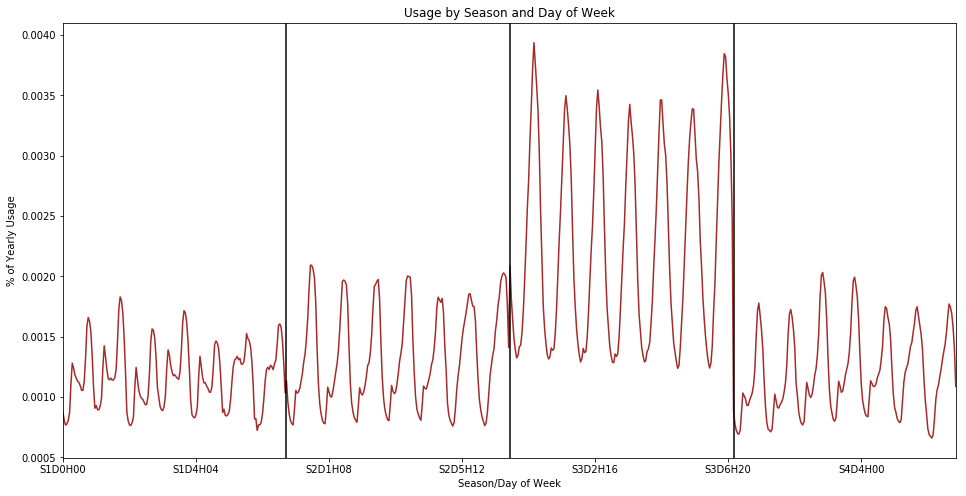

In [12]:
plt.figure(figsize=(16,8))
pivot_table_df.drop('kmeans', axis=1).mean().plot(color="brown")
plt.axvline(168, color='black')
plt.axvline(336, color='black')
plt.axvline(504, color='black')
plt.xlabel('Season/Day of Week')
plt.ylabel('% of Yearly Usage')
plt.title('Usage by Season and Day of Week')
plt.show()

In [14]:
len(pivot_table_df.columns)

673

In [15]:
cluster_centers = pd.DataFrame(data=model.cluster_centers_, columns=pivot_table_df.drop('kmeans', axis=1).columns)

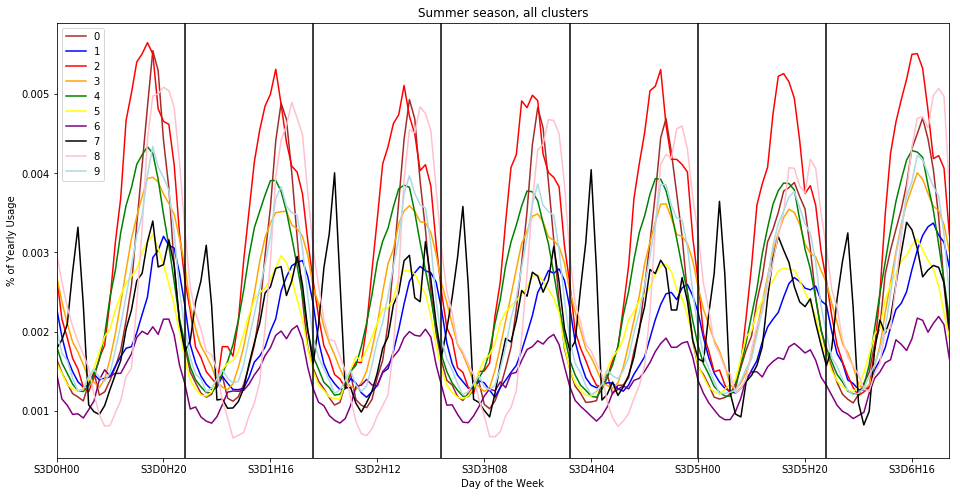

In [16]:
plt.figure(figsize=(16,8))
cluster_centers.transpose()[24*7*2:(24*7*3)][0].plot(color='brown')
cluster_centers.transpose()[24*7*2:(24*7*3)][1].plot(color='blue')
cluster_centers.transpose()[24*7*2:(24*7*3)][2].plot(color='red')
cluster_centers.transpose()[24*7*2:(24*7*3)][3].plot(color='orange')
cluster_centers.transpose()[24*7*2:(24*7*3)][4].plot(color='green')
cluster_centers.transpose()[24*7*2:(24*7*3)][5].plot(color='yellow')
cluster_centers.transpose()[24*7*2:(24*7*3)][6].plot(color='purple')
cluster_centers.transpose()[24*7*2:(24*7*3)][7].plot(color='black')
cluster_centers.transpose()[24*7*2:(24*7*3)][8].plot(color='pink')
cluster_centers.transpose()[24*7*2:(24*7*3)][9].plot(color='lightblue')
plt.xlabel("Day of the Week")
plt.ylabel("% of Yearly Usage")
plt.axvline(24, color='black')
plt.axvline(48, color='black')
plt.axvline(72, color='black')
plt.axvline(96, color='black')
plt.axvline(120, color='black')
plt.axvline(144, color='black')
plt.title("Summer season, all clusters")
plt.legend()
plt.show()

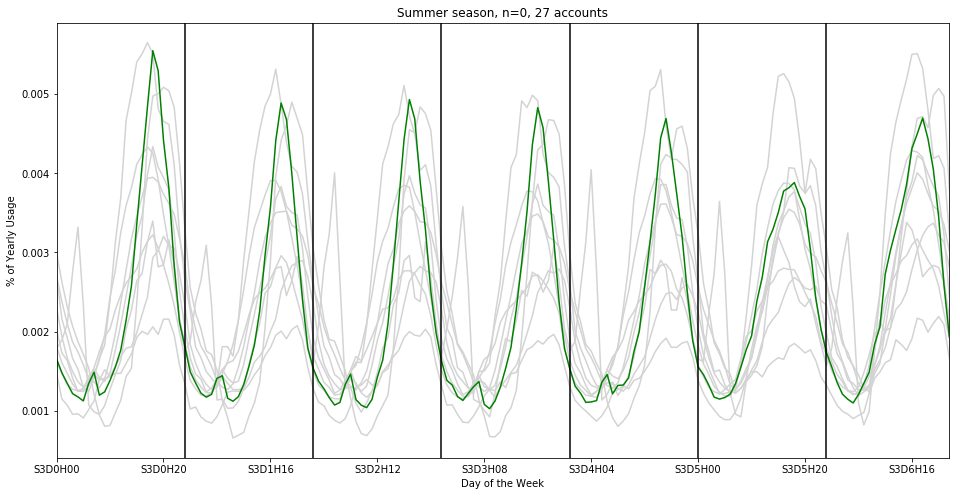

In [17]:
plt.figure(figsize=(16,8))
cluster_centers.transpose()[24*7*2:(24*7*3)][1].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][2].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][3].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][4].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][5].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][6].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][7].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][8].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][9].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][0].plot(color='green')
plt.xlabel("Day of the Week")
plt.ylabel("% of Yearly Usage")
plt.axvline(24, color='black')
plt.axvline(48, color='black')
plt.axvline(72, color='black')
plt.axvline(96, color='black')
plt.axvline(120, color='black')
plt.axvline(144, color='black')
plt.title("Summer season, n=0, 27 accounts")
plt.show()

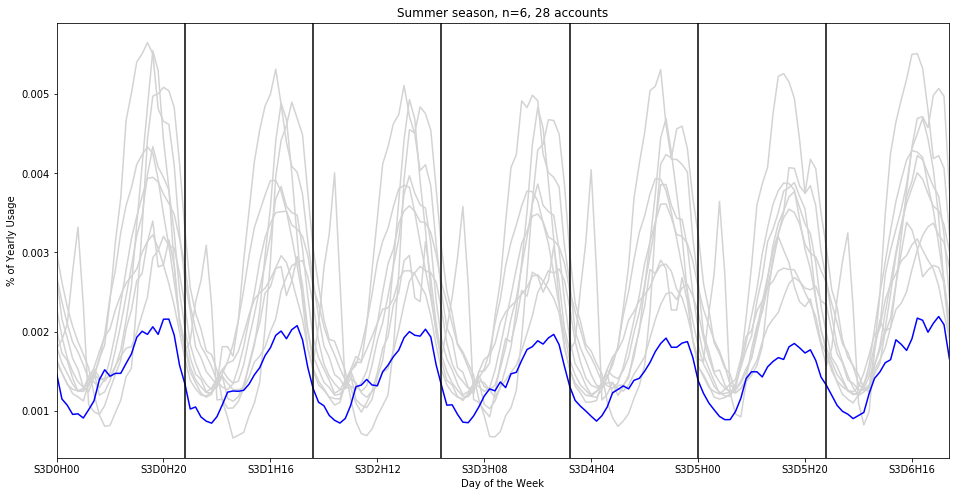

In [18]:
plt.figure(figsize=(16,8))
cluster_centers.transpose()[24*7*2:(24*7*3)][0].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][1].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][2].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][3].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][4].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][5].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][7].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][8].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][9].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][6].plot(color='blue')
plt.xlabel("Day of the Week")
plt.ylabel("% of Yearly Usage")
plt.axvline(24, color='black')
plt.axvline(48, color='black')
plt.axvline(72, color='black')
plt.axvline(96, color='black')
plt.axvline(120, color='black')
plt.axvline(144, color='black')
plt.title("Summer season, n=6, 28 accounts")
plt.show()

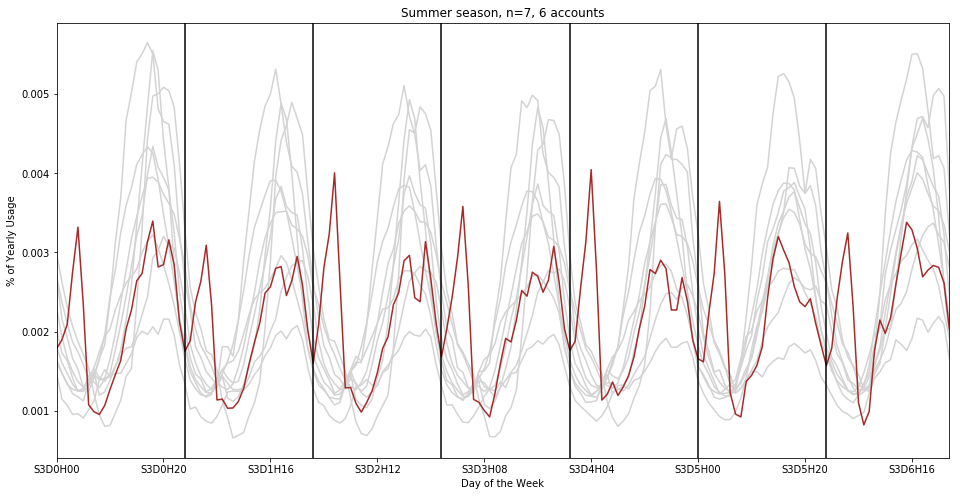

In [19]:
plt.figure(figsize=(16,8))
cluster_centers.transpose()[24*7*2:(24*7*3)][0].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][1].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][2].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][3].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][4].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][5].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][6].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][8].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][9].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][7].plot(color='brown')
plt.xlabel("Day of the Week")
plt.ylabel("% of Yearly Usage")
plt.axvline(24, color='black')
plt.axvline(48, color='black')
plt.axvline(72, color='black')
plt.axvline(96, color='black')
plt.axvline(120, color='black')
plt.axvline(144, color='black')
plt.title("Summer season, n=7, 6 accounts")
plt.show()

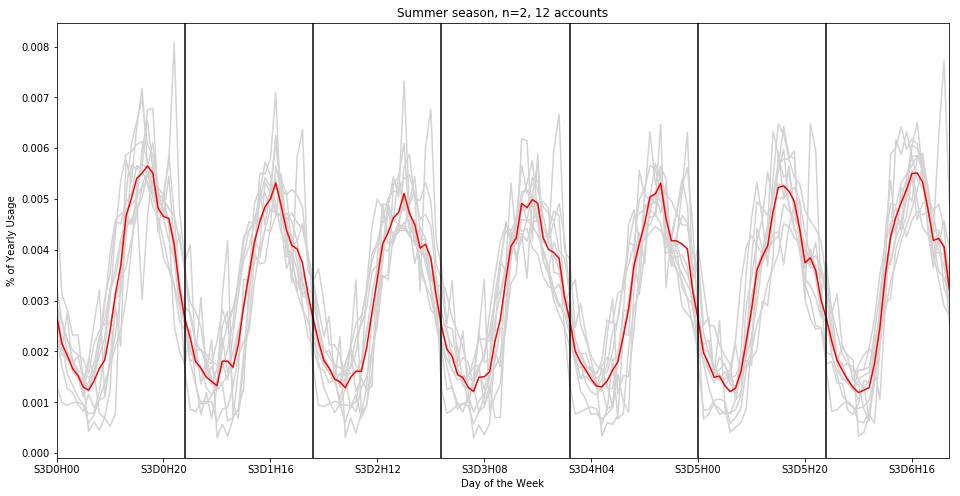

In [35]:
plt.figure(figsize=(16,8))
pivot_table_df.transpose()[24*7*2:(24*7*3)][739].plot(color='lightgrey')
pivot_table_df.transpose()[24*7*2:(24*7*3)][1463].plot(color='lightgrey')
pivot_table_df.transpose()[24*7*2:(24*7*3)][1830].plot(color='lightgrey')
pivot_table_df.transpose()[24*7*2:(24*7*3)][2461].plot(color='lightgrey')
pivot_table_df.transpose()[24*7*2:(24*7*3)][4590].plot(color='lightgrey')
pivot_table_df.transpose()[24*7*2:(24*7*3)][4956].plot(color='lightgrey')
pivot_table_df.transpose()[24*7*2:(24*7*3)][5852].plot(color='lightgrey')
pivot_table_df.transpose()[24*7*2:(24*7*3)][8218].plot(color='lightgrey')
pivot_table_df.transpose()[24*7*2:(24*7*3)][9141].plot(color='lightgrey')
pivot_table_df.transpose()[24*7*2:(24*7*3)][9605].plot(color='lightgrey')
pivot_table_df.transpose()[24*7*2:(24*7*3)][9921].plot(color='lightgrey')
cluster_centers.transpose()[24*7*2:(24*7*3)][2].plot(color='red')
plt.xlabel("Day of the Week")
plt.ylabel("% of Yearly Usage")
plt.axvline(24, color='black')
plt.axvline(48, color='black')
plt.axvline(72, color='black')
plt.axvline(96, color='black')
plt.axvline(120, color='black')
plt.axvline(144, color='black')
plt.title("Summer season, n=2, 12 accounts")
plt.show()

In [37]:
cluster_peak_usage = (cluster_centers['S3D0H16']+cluster_centers['S3D0H17']+cluster_centers['S3D0H18']+\
    cluster_centers['S3D1H16']+cluster_centers['S3D1H17']+cluster_centers['S3D1H18']+\
    cluster_centers['S3D2H16']+cluster_centers['S3D2H17']+cluster_centers['S3D2H18']+\
    cluster_centers['S3D3H16']+cluster_centers['S3D3H17']+cluster_centers['S3D3H18']+\
    cluster_centers['S3D4H16']+cluster_centers['S3D4H17']+cluster_centers['S3D4H18']+\
    cluster_centers['S3D5H16']+cluster_centers['S3D5H17']+cluster_centers['S3D5H18']+\
    cluster_centers['S3D6H16']+cluster_centers['S3D6H17']+cluster_centers['S3D6H18'])

In [38]:
peak_hour_usage = (pivot_table_df['S3D0H16']+pivot_table_df['S3D0H17']+pivot_table_df['S3D0H18']+\
    pivot_table_df['S3D1H16']+pivot_table_df['S3D1H17']+pivot_table_df['S3D1H18']+\
    pivot_table_df['S3D2H16']+pivot_table_df['S3D2H17']+pivot_table_df['S3D2H18']+\
    pivot_table_df['S3D3H16']+pivot_table_df['S3D3H17']+pivot_table_df['S3D3H18']+\
    pivot_table_df['S3D4H16']+pivot_table_df['S3D4H17']+pivot_table_df['S3D4H18']+\
    pivot_table_df['S3D5H16']+pivot_table_df['S3D5H17']+pivot_table_df['S3D5H18']+\
    pivot_table_df['S3D6H16']+pivot_table_df['S3D6H17']+pivot_table_df['S3D6H18'])

In [39]:
over_peak_perc = []
for index, row in peak_hour_usage.iteritems():
    for index2, row2 in pivot_table_df.iterrows():
        if index2 == index:
            kmeans = row2['kmeans']
            
            ttl_usage = ttl_usage_seas_dow_hr_df.groupby('dataid').max()['ttl_usage'][index]
            over_peak_perc.append([index, (row-cluster_peak_usage[kmeans])*ttl_usage])



In [40]:
top_accts_over_peak = pd.DataFrame(over_peak_perc, columns=('dataid', 
            'over_peak_perc')).sort_values(by='over_peak_perc', ascending=False).iloc[:10]


In [41]:
top_accts_over_peak['over_peak_perc'].values

array([ 488.50864726,  414.53694992,  365.42385237,  341.38904443,
        307.23177215,  290.46240567,  290.03726355,  283.65208316,
        276.30419106,  256.33516947])

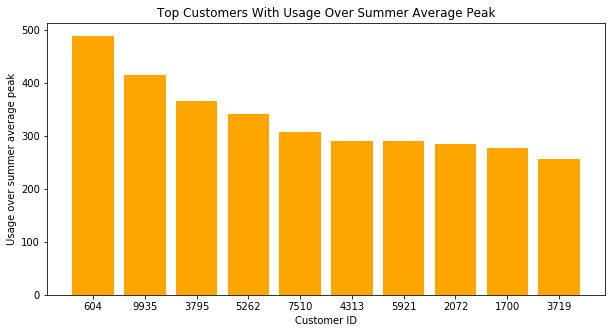

In [70]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(10), top_accts_over_peak['over_peak_perc'].values, color="orange")
plt.xticks(np.arange(10), top_accts_over_peak['dataid'].values)
plt.xlabel("Customer ID")
plt.ylabel("Usage over summer average peak")
plt.title("Top Customers With Usage Over Summer Average Peak")
plt.show()

In [44]:
ttl_usage_seas_dow_hr_df.groupby('dataid').max()['ttl_usage'][26]

12540.01504999998

In [45]:
top_accts_over_peak['over_peak_dollars'] = top_accts_over_peak['over_peak_perc'].values * .03959/2

In [71]:
top_accts_over_peak

dataid  over_peak_perc  over_peak_dollars
25      604      488.508647           9.670029
371    9935      414.536950           8.205759
143    3795      365.423852           7.233565
196    5262      341.389044           6.757796
266    7510      307.231772           6.081653
161    4313      290.462406           5.749703
223    5921      290.037264           5.741288
76     2072      283.652083           5.614893
62     1700      276.304191           5.469441
140    3719      256.335169           5.074155

In [77]:
all_accts_over_peak = pd.DataFrame(over_peak_perc, columns=('dataid', 
            'over_peak_perc')).sort_values(by='over_peak_perc', ascending=False)



In [78]:
all_accts_over_peak = all_accts_over_peak[all_accts_over_peak['over_peak_perc']>0]

In [79]:
all_accts_over_peak['over_peak_dollars'] = all_accts_over_peak['over_peak_perc'].values * .03959/2

In [82]:
all_accts_over_peak['over_peak_dollars'].sum()

329.19405419380558

# DBSCAN

In [69]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN clustering model
dbscan = DBSCAN(eps = 1, min_samples = 3)
dbscan.fit(pivot_table_df)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
    min_samples=3, n_jobs=1, p=None)

In [48]:
labels = dbscan.labels_  
print(labels)

[0 1 2 3 0 4 3 5 2 4 3 3 6 2 4 3 7 6 4 6 1 3 1 5 3 2 2 6 3 8 0 6 4 7 3 6 6
 6 0 4 3 7 6 7 3 7 7 0 5 7 8 7 3 7 3 7 6 4 6 4 3 3 1 5 7 1 3 4 6 0 8 1 2 5
 4 4 5 3 4 5 3 4 0 6 4 7 4 5 6 6 2 8 6 7 3 2 7 7 5 2 1 6 6 3 2 5 3 3 4 6 1
 4 2 5 3 6 3 5 7 4 7 6 2 6 1 2 5 4 1 3 3 7 3 9 2 3 3 3 0 3 6 6 7 9 7 4 4 2
 3 6 4 7 6 4 1 2 4 4 4 6 7 6 0 4 4 6 3 0 7 1 3 6 4 8 1 7 8 1 4 6 7 3 2 7 6
 8 4 4 6 5 4 3 4 1 7 3 3 5 3 7 2 4 2 1 3 3 2 4 0 5 7 6 0 3 4 5 5 0 8 3 2 4
 1 0 4 6 0 3 6 3 3 5 9 1 4 7 6 7 2 3 6 4 4 6 5 9 4 4 2 9 3 1 5 7 4 2 2 7 6
 4 6 3 6 3 6 6 1 6 3 2 6 3 5 4 6 5 4 2 3 0 1 2 3 6 3 0 4 0 7 6 3 9 3 2 4 2
 3 6 3 6 3 7 3 0 5 3 7 8 4 3 2 2 0 2 1 1 2 4 7 1 4 7 7 4 7 0 2 5 7 3 3 6 6
 2 3 1 6 4 8 1 7 3 6 2 3 1 4 7 2 6 8 7 2 2 0 5 5 6 4 4 7 3 0 4 2 3 8 2 4 7
 7 1 4 7 2 7 4 4 4]


In [49]:
# how many clusters were created
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

10


In [50]:
from sklearn import metrics
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(pivot_table_df, labels))

Silhouette Coefficient: 0.983


In [51]:
pivot_table_df['dbscan'] = labels 

In [68]:
pivot_table_df[pivot_table_df['kmeans']== 4]

seas_dow_hr   S1D0H00   S1D0H01   S1D0H02   S1D0H03   S1D0H04   S1D0H05  \
dataid                                                                    
86           0.000402  0.000364  0.000392  0.000387  0.000383  0.000394   
101          0.000472  0.000461  0.000457  0.000447  0.000954  0.001265   
171          0.000806  0.000678  0.000677  0.000665  0.000694  0.000889   
187          0.000688  0.000702  0.000670  0.000632  0.000624  0.000628   
252          0.000770  0.000810  0.000759  0.000748  0.000716  0.000729   
545          0.000404  0.000412  0.000424  0.000435  0.000464  0.000482   
585          0.000582  0.000585  0.000580  0.000610  0.000615  0.000589   
668          0.000702  0.000706  0.000680  0.000650  0.000643  0.000629   
890          0.000504  0.000536  0.000529  0.000549  0.000591  0.000584   
1192         0.000986  0.001184  0.000831  0.000808  0.000736  0.000733   
1314         0.000718  0.000665  0.000657  0.000661  0.000718  0.000655   
1507         0.001555  0.001301  0.001282  0.001283  0.001291  0.001322   
1589         0.000902  0.000736  0.000452  0.000474  0.000462  0.000416   
1696         0.001356  0.001109  0.001149  0.001136  0.001135  0.001204   
1697         0.000586  0.000578  0.000594  0.000577  0.000608  0.000602   
1790         0.000642  0.000648  0.000667  0.000717  0.000713  0.000706   
2094         0.000431  0.000423  0.000424  0.000426  0.000416  0.000514   
2158         0.000638  0.000689  0.000675  0.000612  0.000578  0.000592   
2532         0.000486  0.000438  0.000367  0.000355  0.000331  0.000302   
2769         0.001162  0.000795  0.000528  0.000527  0.000503  0.000532   
2818         0.000674  0.000703  0.000554  0.000597  0.000618  0.000738   
2829         0.000804  0.000742  0.000780  0.000747  0.000646  0.000801   
2980         0.000465  0.000408  0.000401  0.000409  0.000421  0.000439   
3009         0.000944  0.001129  0.000893  0.000765  0.000770  0.000756   
3392         0.001097  0.000995  0.000978  0.000961  0.000960  0.001268   
3394         0.000575  0.000569  0.000570  0.000566  0.000587  0.000586   
3456         0.000763  0.000722  0.000757  0.000749  0.000783  0.000883   
3527         0.000427  0.000419  0.000430  0.000421  0.000456  0.000466   
3538         0.000894  0.000667  0.000600  0.000620  0.000630  0.000640   
3577         0.000538  0.000631  0.000687  0.000576  0.000927  0.000789   
...               ...       ...       ...       ...       ...       ...   
5439         0.000863  0.000767  0.000765  0.000768  0.000774  0.000807   
5785         0.000596  0.000641  0.000652  0.000639  0.000775  0.001080   
5874         0.000665  0.000679  0.000685  0.000722  0.000690  0.000815   
5972         0.000603  0.000597  0.000591  0.000599  0.000613  0.000629   
6063         0.000768  0.000884  0.000840  0.000584  0.000587  0.000632   
6101         0.000886  0.000633  0.000574  0.000549  0.000557  0.000546   
6423         0.000604  0.000601  0.000588  0.000601  0.000622  0.000639   
6887         0.000663  0.000492  0.000390  0.000377  0.000412  0.000874   
7166         0.000760  0.000536  0.000395  0.000374  0.000371  0.000405   
7390         0.000608  0.000610  0.000672  0.000606  0.000650  0.000670   
7536         0.000423  0.000424  0.000443  0.000454  0.000466  0.000515   
7617         0.000613  0.000652  0.000557  0.000491  0.000557  0.000517   
7767         0.000904  0.000893  0.000893  0.000907  0.000965  0.000916   
7793         0.000404  0.000398  0.000390  0.000390  0.000386  0.000408   
7800         0.000829  0.000601  0.000574  0.000573  0.000614  0.000585   
7901         0.000643  0.000594  0.000645  0.000641  0.000618  0.000698   
7951         0.001160  0.001602  0.001659  0.001294  0.001417  0.001604   
8059         0.000442  0.000485  0.000425  0.000454  0.000521  0.000835   
8079         0.000535  0.000537  0.000549  0.000519  0.000553  0.000584   
8086         0.000361  0.000421  0.000399  0.000404  0.000447  0.000489   
8156         0.000362  0.